<a href="https://colab.research.google.com/github/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas

df_persons = pandas.read_csv('https://github.com/Lrizika/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv', index_col=0)

df_persons.describe()


,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [4]:
bins_age = pandas.cut(df_persons['age'], 6)
bins_weight = pandas.cut(df_persons['weight'], 6)
bins_exercise_time = pandas.cut(df_persons['exercise_time'], 6)

pandas.crosstab(bins_weight, [bins_age, bins_exercise_time], normalize='columns')

age                (17.938, 28.333]                ... (69.667, 80.0]               
exercise_time          (-0.3, 50.0] (50.0, 100.0]  ... (100.0, 150.0] (150.0, 200.0]
weight                                             ...                              
(99.854, 124.333]          0.137931      0.114286  ...       0.311111       0.333333
(124.333, 148.667]         0.172414      0.228571  ...       0.111111       0.250000
(148.667, 173.0]           0.068966      0.228571  ...       0.222222       0.416667
(173.0, 197.333]           0.241379      0.171429  ...       0.266667       0.000000
(197.333, 221.667]         0.206897      0.257143  ...       0.088889       0.000000
(221.667, 246.0]           0.172414      0.000000  ...       0.000000       0.000000

[6 rows x 34 columns]

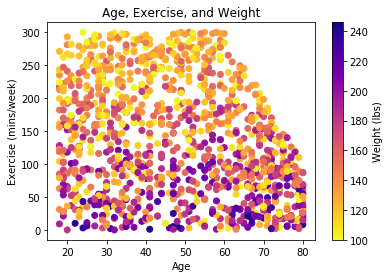

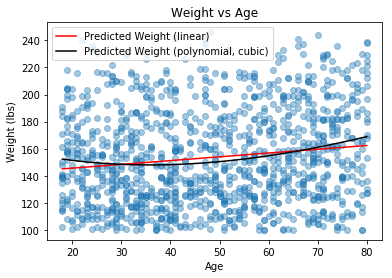

R^2 score for linear model: 0.020784465771999217
R^2 score for polynomial model: 0.028890226044327894


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57667e-17): result may not be accurate.
  overwrite_a=True).T


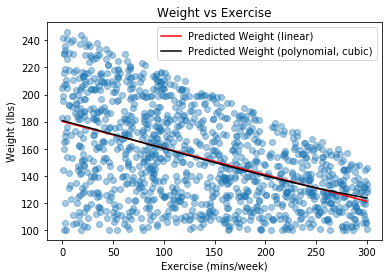

R^2 score for linear model: 0.22850439235424758
R^2 score for polynomial model: 0.22892255579809073


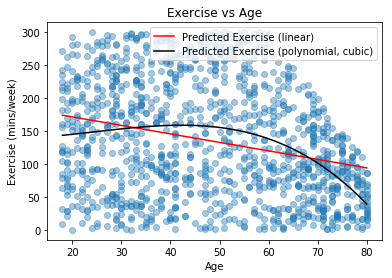

R^2 score for linear model: 0.07497632112974151
R^2 score for polynomial model: 0.12780849249098236


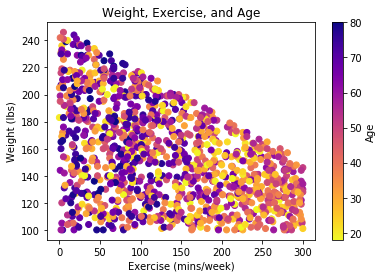

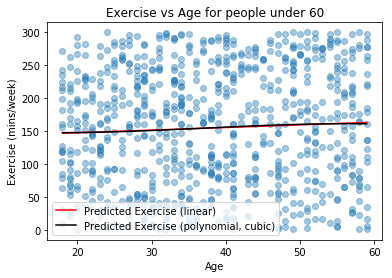

R^2 score for linear model: 0.0030023364858079438
R^2 score for polynomial model: 0.003069691457886159


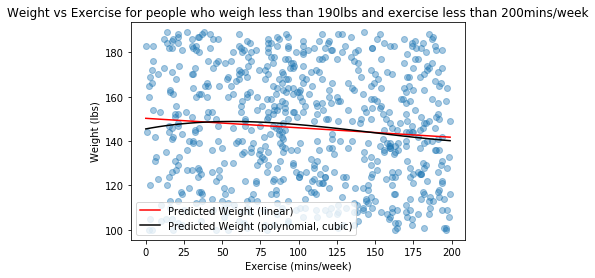

R^2 score for linear model: 0.008470403122872616
R^2 score for polynomial model: 0.011337403903115328


In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

plt.scatter(df_persons['age'],df_persons['exercise_time'],c=df_persons['weight'],cmap='plasma_r')
plt.colorbar().set_label('Weight (lbs)')
plt.xlabel('Age')
plt.ylabel('Exercise (mins/week)')
plt.title('Age, Exercise, and Weight')
plt.show()

# DRY is overrated
# (I had not planned to have quite this much repetition before I started...)

# Scatter
plt.scatter(df_persons['age'],df_persons['weight'], alpha=0.4)
plt.title('Weight vs Age')
plt.xlabel('Age')
plt.ylabel('Weight (lbs)')
# Best fits
# Build an array of sorted values we'll use for plotting purposes
xPlot = np.linspace(min(df_persons['age']),max(df_persons['age'])).reshape(-1,1)
linearModel = LinearRegression()
# Get the right array shape
reshaped = np.array(df_persons['age']).reshape(-1,1)
# Fit the model
linearModel.fit(reshaped,df_persons['weight'])
# Predict our plotting y
linearPlot = linearModel.predict(xPlot)
polyModel = make_pipeline(PolynomialFeatures(3), Ridge())
# Fit the other model
polyModel.fit(reshaped,df_persons['weight'])
# Predict more plotting y
polyPlot = polyModel.predict(xPlot)
plt.plot(xPlot,linearPlot,color='r')
plt.plot(xPlot,polyPlot,color='black')
plt.legend(labels=['Predicted Weight (linear)', 'Predicted Weight (polynomial, cubic)'])
plt.show()
# Predict the y for our independent variable
linearPredicted = linearModel.predict(reshaped)
# And find out what our R^2 score is
r2Lin = r2_score(df_persons['weight'],linearPredicted)
# Do it again for the poly model
polyPredicted = polyModel.predict(reshaped)
r2Poly = r2_score(df_persons['weight'],polyPredicted)
print(f'R^2 score for linear model: {r2Lin}')
print(f'R^2 score for polynomial model: {r2Poly}')

# Scatter
plt.scatter(df_persons['exercise_time'],df_persons['weight'], alpha=0.4)
plt.title('Weight vs Exercise')
plt.xlabel('Exercise (mins/week)')
plt.ylabel('Weight (lbs)')
# Best fits
xPlot = np.linspace(min(df_persons['exercise_time']),max(df_persons['exercise_time'])).reshape(-1,1)
linearModel = LinearRegression()
reshaped = np.array(df_persons['exercise_time']).reshape(-1,1)
linearModel.fit(reshaped,df_persons['weight'])
linearPlot = linearModel.predict(xPlot)
polyModel = make_pipeline(PolynomialFeatures(3), Ridge())
polyModel.fit(reshaped,df_persons['weight'])
polyPlot = polyModel.predict(xPlot)
plt.plot(xPlot,linearPlot,color='r')
plt.plot(xPlot,polyPlot,color='black')
plt.legend(labels=['Predicted Weight (linear)', 'Predicted Weight (polynomial, cubic)'])
plt.show()
linearPredicted = linearModel.predict(reshaped)
r2Lin = r2_score(df_persons['weight'],linearPredicted)
polyPredicted = polyModel.predict(reshaped)
r2Poly = r2_score(df_persons['weight'],polyPredicted)
print(f'R^2 score for linear model: {r2Lin}')
print(f'R^2 score for polynomial model: {r2Poly}')

# Scatter
plt.scatter(df_persons['age'],df_persons['exercise_time'], alpha=0.4)
plt.title('Exercise vs Age')
plt.ylabel('Exercise (mins/week)')
plt.xlabel('Age')
# Best fits
xPlot = np.linspace(min(df_persons['age']),max(df_persons['age'])).reshape(-1,1)
linearModel = LinearRegression()
reshaped = np.array(df_persons['age']).reshape(-1,1)
linearModel.fit(reshaped,df_persons['exercise_time'])
linearPlot = linearModel.predict(xPlot)
polyModel = make_pipeline(PolynomialFeatures(3), Ridge())
polyModel.fit(reshaped,df_persons['exercise_time'])
polyPlot = polyModel.predict(xPlot)
plt.plot(xPlot,linearPlot,color='r')
plt.plot(xPlot,polyPlot,color='black')
plt.legend(labels=['Predicted Exercise (linear)', 'Predicted Exercise (polynomial, cubic)'])
plt.show()
linearPredicted = linearModel.predict(reshaped)
r2Lin = r2_score(df_persons['exercise_time'],linearPredicted)
polyPredicted = polyModel.predict(reshaped)
r2Poly = r2_score(df_persons['exercise_time'],polyPredicted)
print(f'R^2 score for linear model: {r2Lin}')
print(f'R^2 score for polynomial model: {r2Poly}')

plt.scatter(df_persons['exercise_time'],df_persons['weight'],c=df_persons['age'],cmap='plasma_r')
plt.title('Weight, Exercise, and Age')
plt.xlabel('Exercise (mins/week)')
plt.ylabel('Weight (lbs)')
plt.colorbar().set_label('Age')
plt.show()


# Let's see what the data looks like if we cut off the suspicious empty zones...

df_youngsters = df_persons[df_persons['age'] < 60]
# Scatter
plt.scatter(df_youngsters['age'],df_youngsters['exercise_time'], alpha=0.4)
plt.title('Exercise vs Age for people under 60')
plt.ylabel('Exercise (mins/week)')
plt.xlabel('Age')
# Best fits
xPlot = np.linspace(min(df_youngsters['age']),max(df_youngsters['age'])).reshape(-1,1)
linearModel = LinearRegression()
reshaped = np.array(df_youngsters['age']).reshape(-1,1)
linearModel.fit(reshaped,df_youngsters['exercise_time'])
linearPlot = linearModel.predict(xPlot)
polyModel = make_pipeline(PolynomialFeatures(3), Ridge())
polyModel.fit(reshaped,df_youngsters['exercise_time'])
polyPlot = polyModel.predict(xPlot)
plt.plot(xPlot,linearPlot,color='r')
plt.plot(xPlot,polyPlot,color='black')
plt.legend(labels=['Predicted Exercise (linear)', 'Predicted Exercise (polynomial, cubic)'])
plt.show()
linearPredicted = linearModel.predict(reshaped)
r2Lin = r2_score(df_youngsters['exercise_time'],linearPredicted)
polyPredicted = polyModel.predict(reshaped)
r2Poly = r2_score(df_youngsters['exercise_time'],polyPredicted)
print(f'R^2 score for linear model: {r2Lin}')
print(f'R^2 score for polynomial model: {r2Poly}')

df_t = df_persons[df_persons['exercise_time'] < 200]
df_center = df_t[df_t['weight'] < 190]
# Scatter
plt.scatter(df_center['exercise_time'],df_center['weight'], alpha=0.4)
plt.title('Weight vs Exercise for people who weigh less than 190lbs and exercise less than 200mins/week')
plt.xlabel('Exercise (mins/week)')
plt.ylabel('Weight (lbs)')
# Best fits
xPlot = np.linspace(min(df_center['exercise_time']),max(df_center['exercise_time'])).reshape(-1,1)
linearModel = LinearRegression()
reshaped = np.array(df_center['exercise_time']).reshape(-1,1)
linearModel.fit(reshaped,df_center['weight'])
linearPlot = linearModel.predict(xPlot)
polyModel = make_pipeline(PolynomialFeatures(3), Ridge())
polyModel.fit(reshaped,df_center['weight'])
polyPlot = polyModel.predict(xPlot)
plt.plot(xPlot,linearPlot,color='r')
plt.plot(xPlot,polyPlot,color='black')
plt.legend(labels=['Predicted Weight (linear)', 'Predicted Weight (polynomial, cubic)'])
plt.show()
linearPredicted = linearModel.predict(reshaped)
r2Lin = r2_score(df_center['weight'],linearPredicted)
polyPredicted = polyModel.predict(reshaped)
r2Poly = r2_score(df_center['weight'],polyPredicted)
print(f'R^2 score for linear model: {r2Lin}')
print(f'R^2 score for polynomial model: {r2Poly}')
# print(xPlot.shape)
# print(linearPlot.shape)



### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

All three are continuous ints

2.  What are the relationships between the variables?

There appears to be some correlation between weight and exercise, and a weaker one between exercise and age. While there may be a very slight correlation between weight and age, it is so weak as to be functionally drowned out in the noise.

Note that there are hard boundaries in the weight vs exercise and exercise vs age plots. These boundaries are extremely suspicious - I would expect at least a few outliers in a real-world dataset, and would verify the data collection methods were I to encounter this data in the wild.

3.  Which relationships are "real", and which spurious?

There is probably a real relationship between weight and exercise, and exercise and age. The relationship between age and weight is functionally spurious.

Further testing indicates that the relationships between weight and exercise are entirely due to the areas in which no data falls. I'm not sure how to best determine the precise shape and location of these areas, however selecting a subset of data that does not include the blank spots results in negligible or no correlation.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)